Note: you may need to restart the kernel to use updated packages.
         Date     Price  Volume  Price change  Volume change
0  2024-04-04  2,449.00     0.0          0.82            NaN
1  2024-04-03  2,429.00     0.0          2.06            NaN


/var/folders/gk/lwvxlf616ggf8j4h0y1hjl6c0000gn/T/ipykernel_95365/1671314584.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return_df = return_df.merge(brent[['Date', 'Price change']], on='Date', how='left', suffixes=('_brent'))
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date                      0
Price change              0
Price change_cofee        0
Price change_copper       0
Price change_corn         0
Price change_cotton       0
Price change_gasoline     0
Price change_gold         0
Price change_nickel       0
Price change_palladium    0
Price change_silver       0
Price change_soybean      0
Price change_wheat        0
Price change_wti          0
Price change_zinc         0
Price change_cocoa        0
dtype: int64
Date             0
brent_log        0
cocoa_log        0
cofee_log        0
copper_log       0
corn_log         0
cotton_log       0
gasoline_log     0
gold_log         0
nickel_log       0
palladium_log    0
silver_log       0
soybean_log      0
wheat_log        0
wti_log          0
zinc_log         0
dtype: int64
Fitting GJR-GARCH model for brent_log
Best parameters for brent_log: p=1, o=1, q=1
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    brent_log   R-square

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best parameters for cocoa_log: p=1, o=0, q=1
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    cocoa_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7530.89
Distribution:      Standardized Student's t   AIC:                           15071.8
Method:                  Maximum Likelihood   BIC:                           15103.1
                                              No. Observations:                 3864
Date:                      Wed, Apr 24 2024   Df Residuals:                     3863
Time:                              17:15:05   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

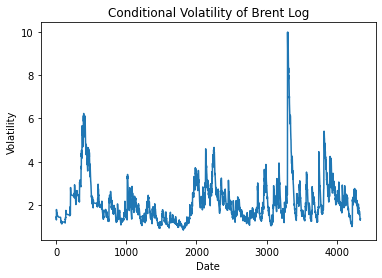

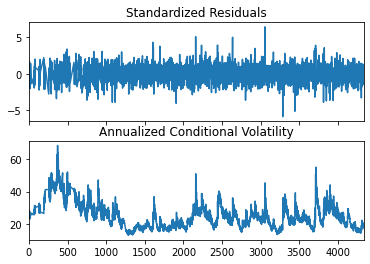

   brent_log  cocoa_log  cofee_log  copper_log  corn_log  cotton_log  \
0   1.449971   1.583020   1.832224    1.694749  2.150980    1.696608   
1   1.435268   1.561643   2.062589    1.642173  2.093257    1.633911   
2   1.442929   1.561031   2.045212    1.647629  2.006791    1.621557   
3   1.395760   1.555597   2.027745    1.623038  1.956851    2.010457   
4   1.360467   1.535933   1.998337    1.641168  1.930230    1.556504   

   gasoline_log  gold_log  nickel_log  palladium_log  silver_log  soybean_log  \
0      3.429627  1.013784    3.338787       2.743124    1.568978     1.407807   
1      3.365278  1.048336    3.348469       2.613345    1.622440     1.416620   
2      3.345079  1.030368    3.308727       2.545324    1.555523     1.382199   
3      3.345589  1.013228    3.076399       2.582950    1.560335     1.401482   
4      3.300274  0.996074    3.077881       2.467970    1.527784     1.374253   

   wheat_log   wti_log  zinc_log  
0   2.454408  1.574095  1.709206  
1   2.3894

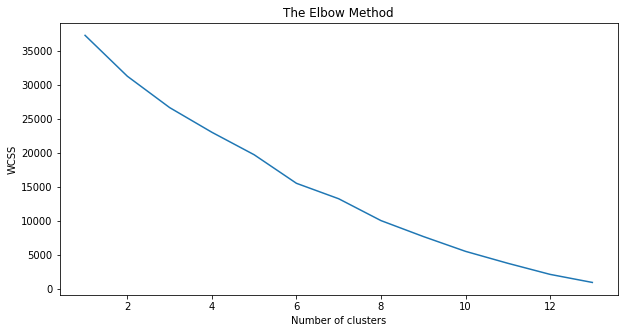

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


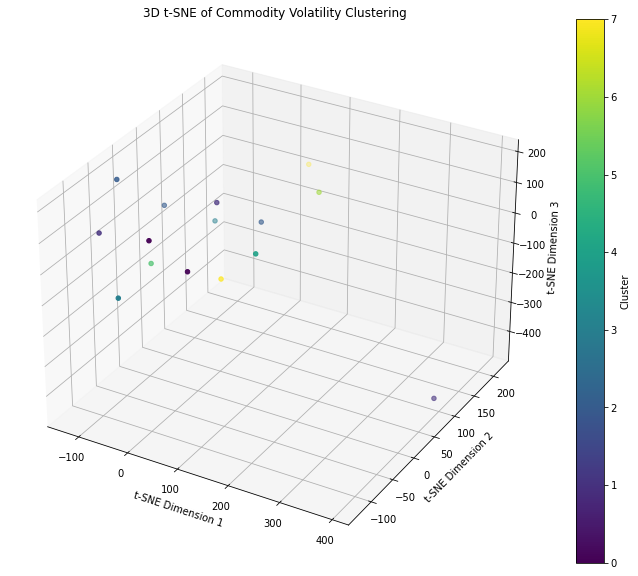

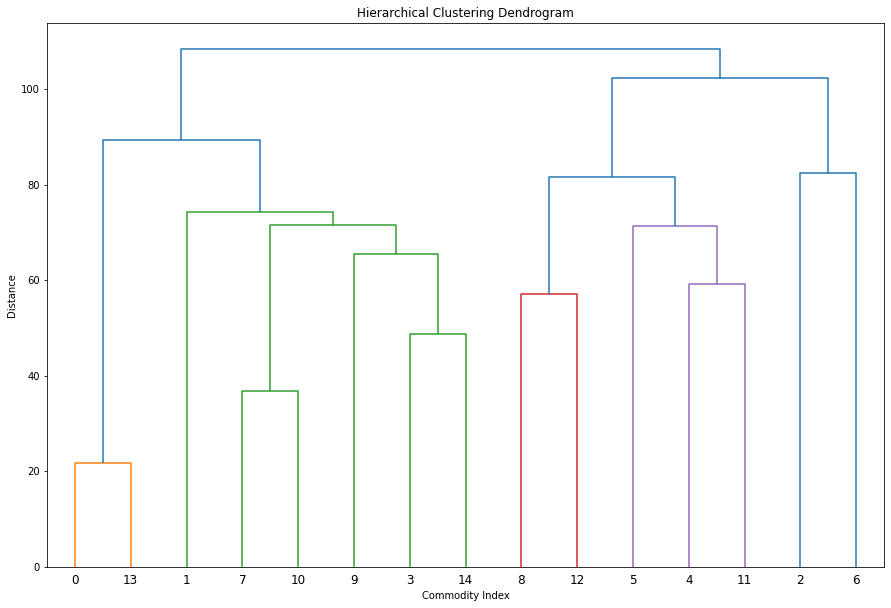

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


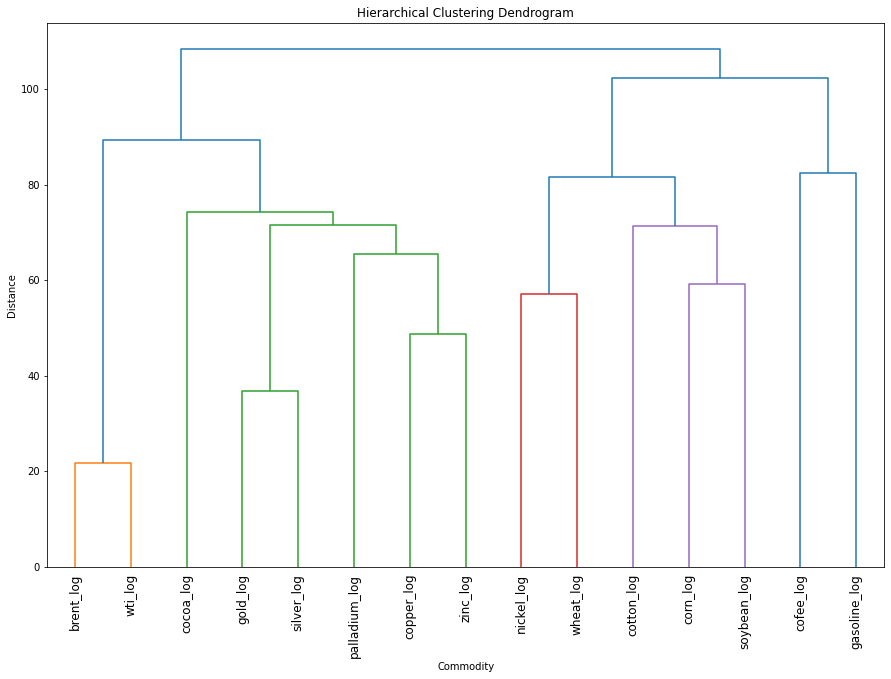

In [1]:
%run "/Users/nickarhi/Desktop/Studying/Project HSE 4th course/Codes/Volatility_clustering.ipynb"

In [18]:
import numpy as np
import pandas as pd
from fastdtw import fastdtw
from scipy.spatial.distance import squareform
import seaborn as sns

In [15]:
df_volatility = volatility_df.T  

scaler = StandardScaler()
volatility_scaled = scaler.fit_transform(df_volatility)

In [10]:
volatility_scaled

array([[-0.76669246, -0.80012372, -0.75175414, ..., -0.57705002,
        -0.48747712, -0.48592501],
       [-0.57295309, -0.6102203 , -0.57189717, ...,  2.01901245,
         2.25003569,  2.31521321],
       [-0.21007405,  0.142554  ,  0.16546529, ...,  0.42466669,
         0.511913  ,  0.36571148],
       ...,
       [ 0.69591781,  0.63376702,  0.58409673, ...,  0.46578827,
         0.49776931,  0.43045939],
       [-0.58594926, -0.62775087, -0.6461223 , ..., -0.38930591,
        -0.12070838, -0.30278441],
       [-0.3892073 , -0.35260454, -0.32424254, ..., -0.81056177,
        -0.84908665, -0.85064935]])

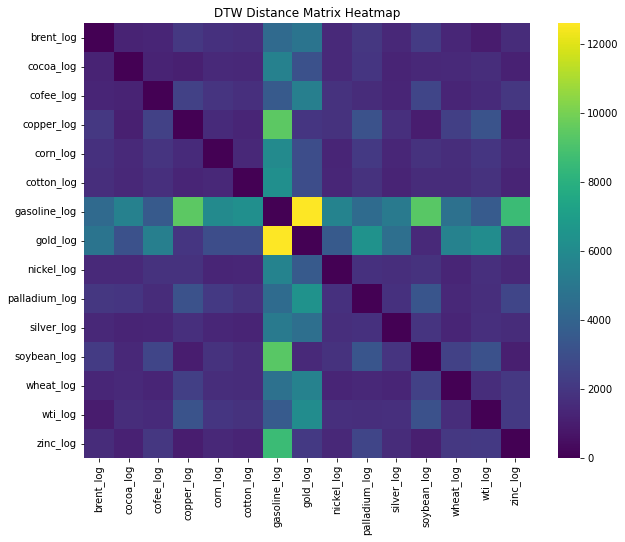

In [19]:
scaler = StandardScaler()
volatility_scaled = scaler.fit_transform(df_volatility)


def compute_dtw_matrix(data):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):  
            distance, _ = fastdtw(data[i], data[j])
            dist_matrix[i, j] = dist_matrix[j, i] = distance
    return dist_matrix


distance_matrix = compute_dtw_matrix(volatility_scaled)


df_distance_matrix = pd.DataFrame(distance_matrix, index=df_volatility.index, columns=df_volatility.index)

plt.figure(figsize=(10, 8))
sns.heatmap(df_distance_matrix, cmap='viridis')
plt.title('DTW Distance Matrix Heatmap')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


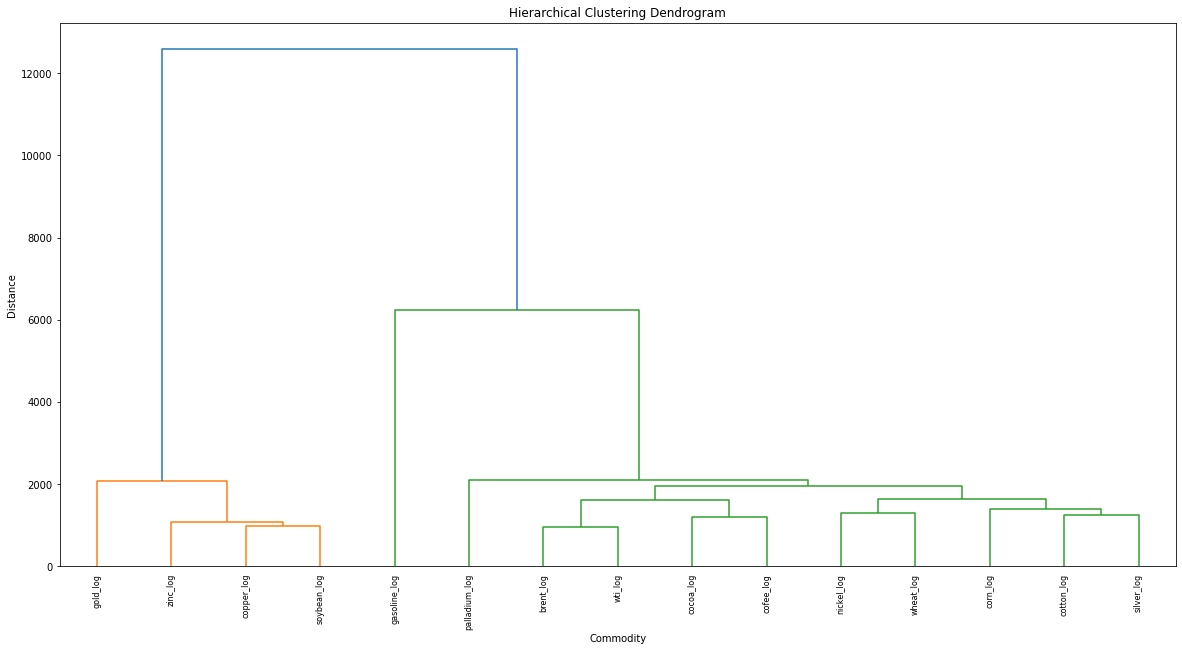

In [28]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

df_volatility.index
cluster = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=0)
cluster.fit(df_distance_matrix)


labels = df_distance_matrix.index.to_list() 


plt.figure(figsize=(20, 10))  


def plot_dendrogram(model, labels):
    from scipy.cluster.hierarchy import dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, labels=labels)
    plt.xlabel("Commodity")
    plt.ylabel("Distance")


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster, labels=df_distance_matrix.index.to_list())
plt.xticks(rotation=90)  
plt.tick_params(axis='x', which='major', labelsize=8)  
plt.show()
